#### ELEC-E8740 Basics of Sensor Fusion <br>
#### Homework 8 <br>
#### Hoang Nguyen Khac 533263

In [35]:
%matplotlib inline
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

Given the scalar function
$$
\dot x = a \, x + u
$$
and 
$$
x(0) = x_0, \, a = -1/2, \, x_0 = 3
$$
and 
$$
u = u(t)
$$
is some input function.

In [36]:
t = np.linspace(0,10,100)
x0 = 3
a = -1/2
dt = 0.1
x = np.zeros((t.shape[0],2))
u = 1


#### a.
Form discretization of the model with ZOH approximation in form
$$
x_n = f_n \, x_{n−1} + l_n \, u_{n−1}. 
$$
where discretization step $\Delta \, t = 0.1$. <br>
By definition
$$
\begin{align}
f_n &= e^{a \, (t_n \, - \, t_{n-1})} \\
l_n &= \int_{t_{n-1}}^{t_n} e^{a \, (t_n \, - \, t)} \, dt \\
l_n &= \frac{1}{a}(e^{a(t_n-t_{n-1}})-1)
\end{align}
$$

In [37]:
def fn(a, t_n, t_n_1):
    return np.exp(a*(t_n-t_n_1))

def ln(a, t_n, t_n_1):
    return (1/a)*(np.exp(a*(t_n-t_n_1))-1)

#### b.
By assuming that $u(t) = 1$, and $\Delta \, t = 0.1$ simulate trajectory of length
100 steps from the discretized model.

In [38]:
cx = x0
x[0,:] = cx

for i in range(1,t.shape[0]):
    cx = fn(a,t[i], t[i-1])*cx + ln(a, t[i], t[i-1])*u
    x[i,:] = cx
    i = i + 1

#### c.
Solving the equation with built-in ODE solver. 

In [39]:
def func(x,t):
    return a*x + u

x_ODE = integrate.odeint(func,x0,t)

#### Visualizing the data

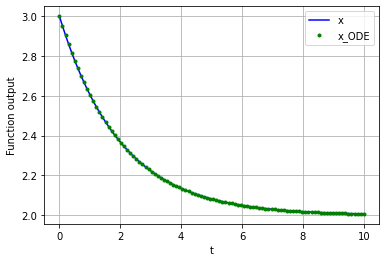

In [40]:
plt.clf()

plt.plot(t,x[:,1],'b', label='x')
plt.plot(t,x_ODE,'g.', label='x_ODE')

plt.xlabel('t')
plt.ylabel('Function output')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()